# Findings from Fordgobike datasets
## by Jin Zhou

## Investigation Overview

The goal of this analysis is to understand the trip duration for Ford GoBike System for the whole year 2018 in San Franciso area. 

## Dataset Overview

This dataset includes 1.85 million trips with various features including as start/end locations, time and user attributes. The size of datasets include 1.8 million trip records. From station longitude and lattitude we can see that there are actually three cities included, 'San Francisco', 'Oakland' and 'San Jose'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_bike_data_added_new_feature.csv')

## (Visualization 1)

> Median trip duration seconds is only around 540 secs on week day, while on weekend, the median duration will be 640 seconds. 

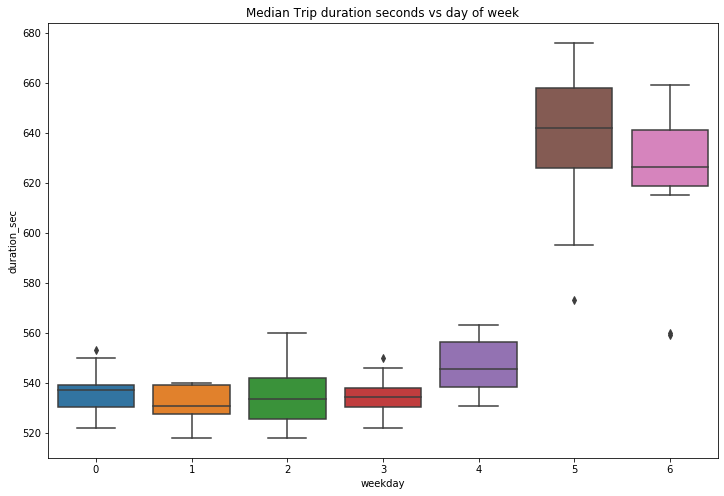

In [3]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = "weekday", y = "duration_sec", 
           data = df.groupby(["weekday", "month"], as_index = False).median()).set_title('Median Trip duration seconds vs day of week');

## (Visualization 2)

> For all the three cities, the median duration secs is lower during week day than weekends, with clear trend that median duration for San Francisco is highest, then Oakland, followed by San Jose. It seems true for all 7 days of the week.

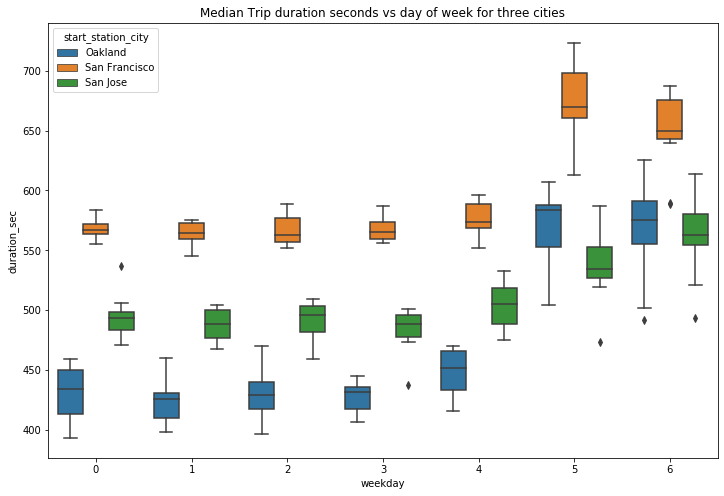

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = "weekday", y = "duration_sec", 
           data = df.groupby(["weekday", "month", 'start_station_city'], as_index = False).median(), 
           hue = 'start_station_city').set_title('Median Trip duration seconds vs day of week for three cities');

## (Visualization 3)

> In oakland, median duration secs seems have the trend of increasing duration secs for both subscriber and customer. While it is not true for other cities, like San Francisco and San Jose. San Francisco and San Jose subscriber median trip duration secs is less changing with week of day. San Jose the customer median trip duration secs trend for weekend and week day is not obvious than other two cities.

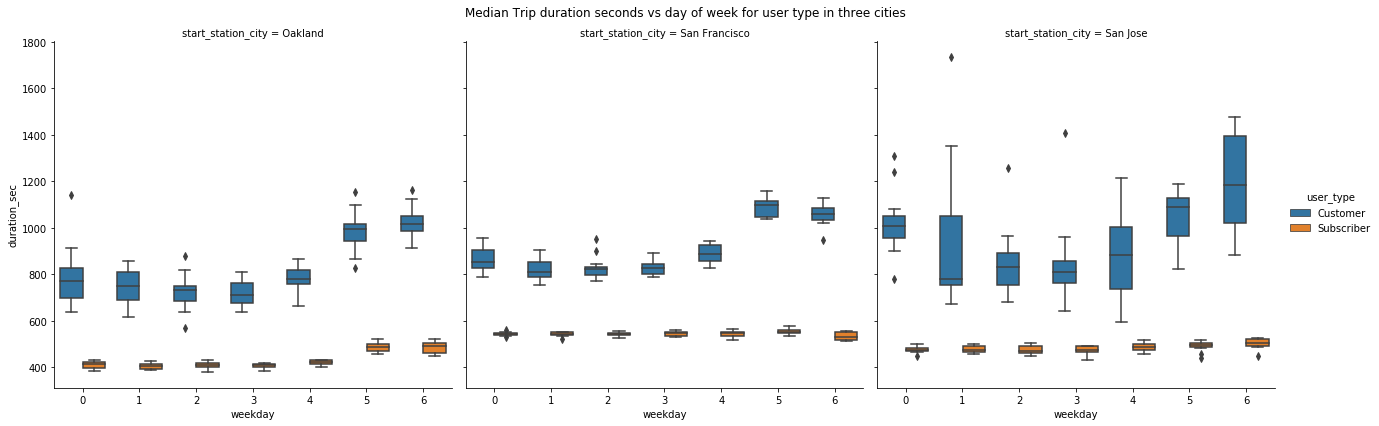

In [5]:
g = sns.catplot(x = "weekday", y = "duration_sec", 
           data = df.groupby(["weekday", 'month', 'user_type', 'start_station_city'], as_index = False).median(), 
           hue = 'user_type', col = 'start_station_city', kind='box', size=6, aspect=1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Median Trip duration seconds vs day of week for user type in three cities');